<a href="https://colab.research.google.com/github/benpkxd/Data-Analysis-Skills/blob/main/Python/Datapreb%2BDataAnalyze/Python_for_ML_(LogReg).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
organizations_uciml_pima_indians_diabetes_database_path = kagglehub.dataset_download('organizations/uciml/pima-indians-diabetes-database')

print('Data source import complete.')


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
col_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#split dataset
factors_cols =['Pregnancies','Glucose','BloodPressure','Insulin','BMI','Age','DiabetesPedigreeFunction']
x = df[factors_cols] #factors var.
y = df.Outcome #target var.

In [ ]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#split train test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size  = 0.20,random_state = 20)

In [ ]:
#import the class
from sklearn.linear_model import LogisticRegression
#generate model
logreg = LogisticRegression(random_state=20)


In [ ]:
#fit the model with data
logreg.fit(x_train, y_train)



LogisticRegression(random_state=20)

In [ ]:
y_pred = logreg.predict(x_test)

In [ ]:
#Evaluate model
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test,y_pred)
matrix

array([[88, 13],
       [24, 29]])

The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 88 and 29 are actual predictions, and 13 and 24 are incorrect predictions.

Text(50.722222222222214, 0.5, 'Predicted label')

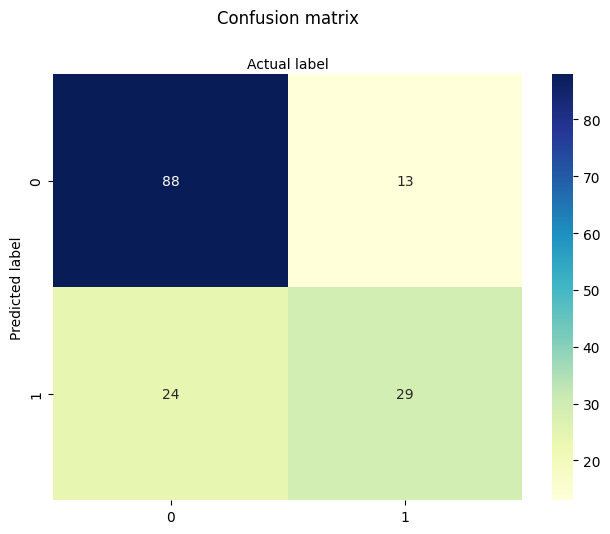

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create heatmap
sns.heatmap(pd.DataFrame(matrix),annot = True , cmap = 'YlGnBu',fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')



This code imports the required modules numpy, matplotlib.pyplot, and seaborn. It then defines a list of class names and creates a subplots object using matplotlib. It also creates tick marks for the x and y axes using numpy's arange function and sets the tick labels to the class names.


The code then creates a heatmap using seaborn's heatmap function, passing in a pandas DataFrame containing the confusion matrix as an argument. The heatmap is annotated with the values in the matrix and colored using the YlGnBu colormap.


The x-axis label is set to be on top of the plot using the xaxis.set_label_position method, and the plot is tightened using the tight_layout method. The title of the plot is set to "Confusion matrix" with a y-coordinate of 1.1, and the y-axis and x-axis labels are set to "Actual label" and "Predicted label", respectively.

In [ ]:
#evaluate metric
from sklearn.metrics import classification_report
target_names = ['without diabetes','with diabetes']
print(classification_report(y_test,y_pred,target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.87      0.83       101
   with diabetes       0.69      0.55      0.61        53

        accuracy                           0.76       154
       macro avg       0.74      0.71      0.72       154
    weighted avg       0.75      0.76      0.75       154



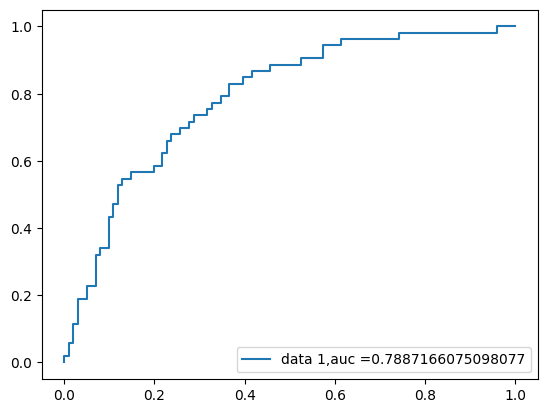

In [ ]:
#ROC curve
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1,auc ="+str(auc))
plt.legend(loc=4)
plt.show()
